# Wholesale customers Data Set

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Content</h3>

* [1. Libraries](#1)
* [2. Reading and Exploring the Data](#2)
* [3. Deliverables:](#3)
    - [3.1 Use methods of descriptive statistics to summarize data](#3.1)
        - [3.1.1  Which Region and which Channel seems to spend more?](#3.1.1)
        - [3.1.2  Which Region and which Channel seems to spend less?](#3.1.2)
    - [3.2 Do all varieties show similar behaviour across Region and Channel?](#3.2)
    - [3.3.1 which item shows the most inconsistent behaviour?](#3.3)
    - [3.3.2 Which items shows the least inconsistent behaviour?](#3.3)
    - [3.4 Which columns in the dataset are of type Categorical and which are of type Numerical ?](#3.4) 
* [4. Conclusion of the EDA](#4)

# 

<a id="1"></a>
<font color="darkslateblue" size=+2.5><b>1. Libraries</b></font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st



import warnings
warnings.filterwarnings('ignore')

<a id="2"></a>
<font color="darkslateblue" size=+2.5><b>2. Reading and Exploring the Data</b></font>

In [2]:
# Reading Wholesale Customers Dataset
df = pd.read_csv('Wholesale customers.csv',index_col=0)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


In [3]:
# Data shape results 
print(f'Dataset shape: {df.shape}')

Dataset shape: (440, 8)


By checking the data shape results, now we know that there are total of 440 rows with 8 columns in this Dataset, here's the explnation of the columns:

* **CHANNEL :** Customers Channel - Hotel (Hotel/Restaurant/Café HoReCa) or Retail
* **REGION :** Customers Region Lisnon, Oporto or Other
* **FRESH :** annual spending (m.u.) on fresh products
* **MILK :** annual spending (m.u.) on milk products
* **GROCERY :** annual spending (m.u.)on grocery products
* **FROZEN :** annual spending (m.u.)on frozen products
* **DETERGENTS PAPER :** annual spending (m.u.) on detergents and paper products
* **DELICATESSEN :** annual spending (m.u.)on and delicatessen products


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicassen        440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 30.9+ KB


In [5]:
# Inspect the dataset
print(df.index.is_unique)
print(df.columns.is_unique)
print(df[df.duplicated() == True])

True
True
Empty DataFrame
Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]
Index: []


The orders data set is ready to use as no duplicated values for rows and columns, all of them are unique.

In [6]:
# Check if there's missing values for the dataset
print(df.isna().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


Overall, The dataset is checked with no duplicated values and no missing values. They are ready to use for our data analysis.

# 

We are going to start exploring our data with the Univariate analysis (each feature individually) and the Bivariate analysis 

# Univariate Analysis

In [7]:
df['Channel'].value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

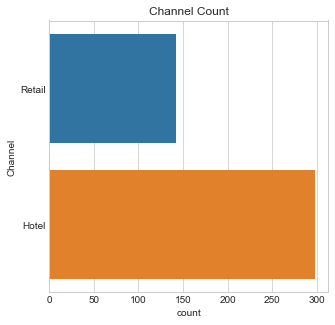

In [8]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(5,5))
plt.title('Channel Count');
sns.countplot(y='Channel',data=df);

In [9]:
df['Region'].value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

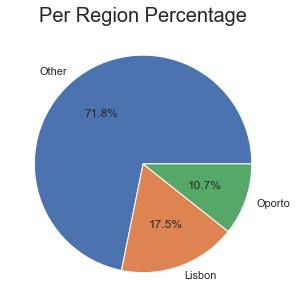

In [42]:
plt.figure(figsize=(10,5))
plt.title('Per Region Percentage',fontsize=20)
plt.pie(df['Region'].value_counts(),labels=['Other','Lisbon','Oporto'],autopct='%.1f%%');

# 

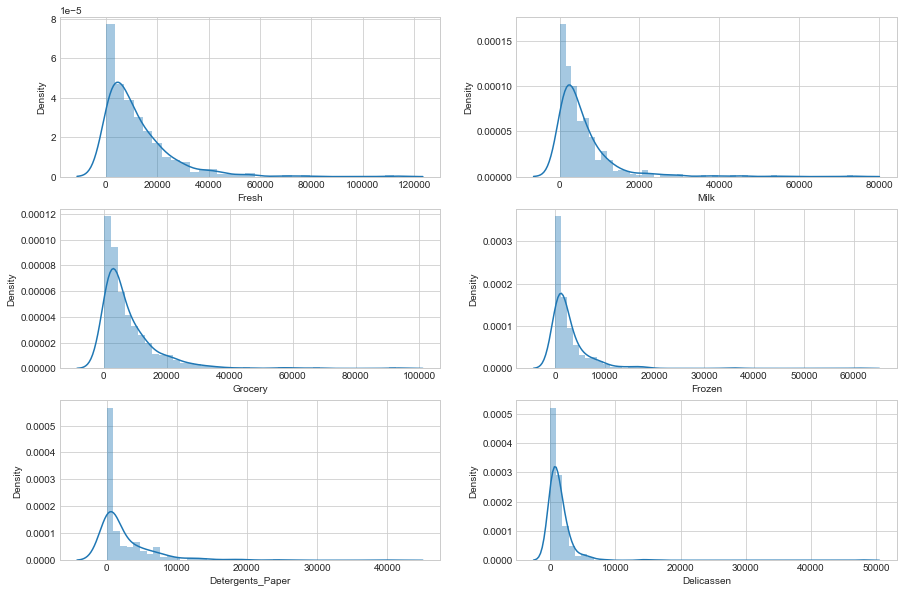

In [11]:
plot_number = 1
plt.figure(figsize = (15,10))
for i in df.select_dtypes('int').columns:
    plt.subplot(3,2,plot_number)
    sns.distplot(df[i]);
    plot_number+=1
    

From the graphs on the distribution of product it seems that we have some outliers in the data, let's have a closer look before we decide what to do:

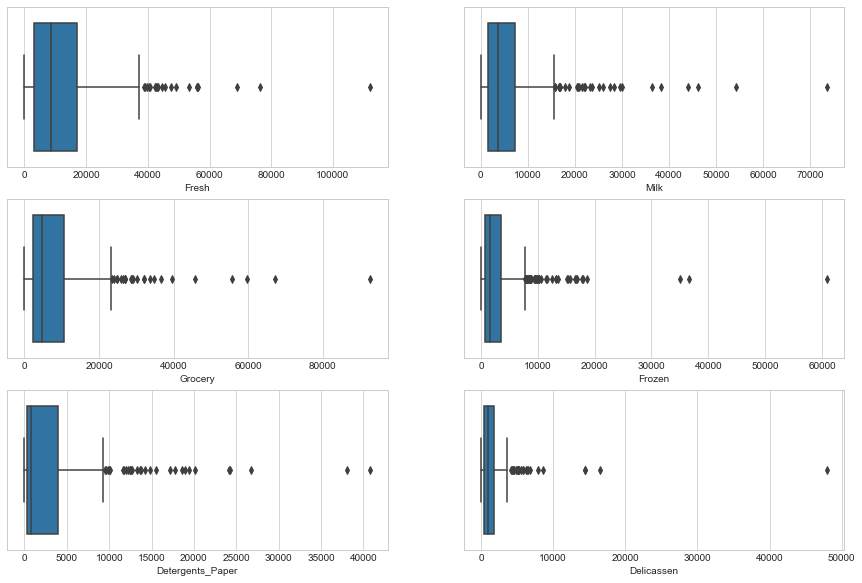

In [12]:
plot_number = 1
plt.figure(figsize = (15,10))
for i in df.select_dtypes('int').columns:
    plt.subplot(3,2,plot_number)
    sns.boxplot(df[i]);
    plot_number+=1

Outliers are detected but not necessarily removed, it depends of the situation. Here I will assume that the wholesale distributor provided us a dataset with correct data, so I will keep them as is.

# Bivariate Analysis

In [13]:
df.groupby('Channel')['Region'].value_counts()

Channel  Region
Hotel    Other     211
         Lisbon     59
         Oporto     28
Retail   Other     105
         Oporto     19
         Lisbon     18
Name: Region, dtype: int64

<AxesSubplot:xlabel='Channel'>

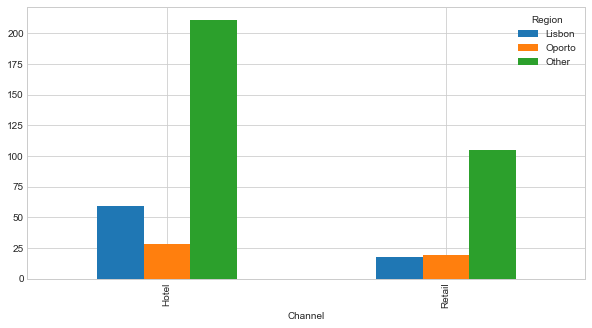

In [14]:
pd.crosstab(df['Channel'],df['Region']).plot(kind='bar',figsize=(10,5))

Let's use Seaborn pairplot to have a first look at how our data is interracting.

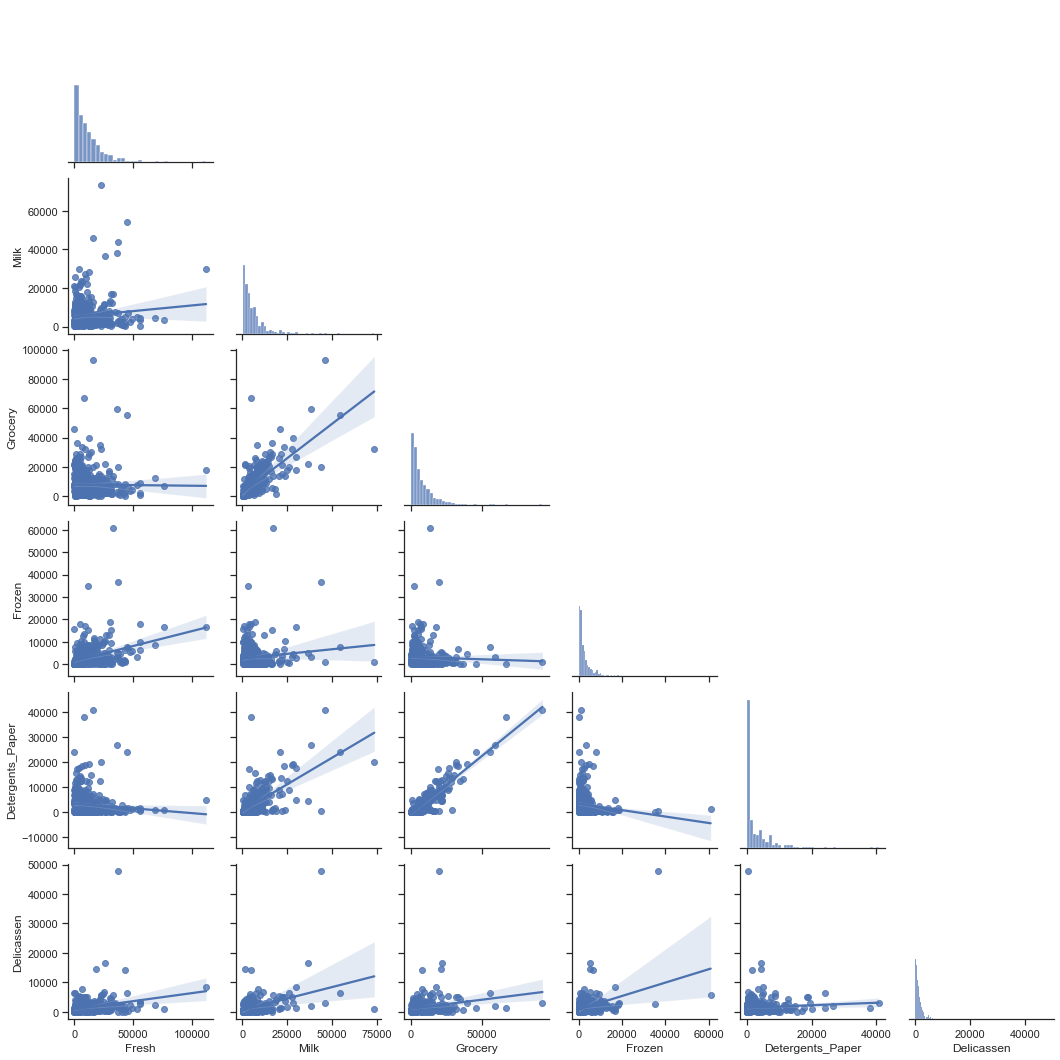

In [15]:
sns.set(style="ticks")
sns.pairplot(df,corner=True,kind='reg')

From the pairplot above, the correlation between the "detergents and paper products" and the "grocery products" seems to be pretty strong, meaning that consumers would often spend money on these two types of products. Let's look at the Pearson correlation coefficient to confirm this:



<AxesSubplot:title={'center':'Pearson Correlation'}>

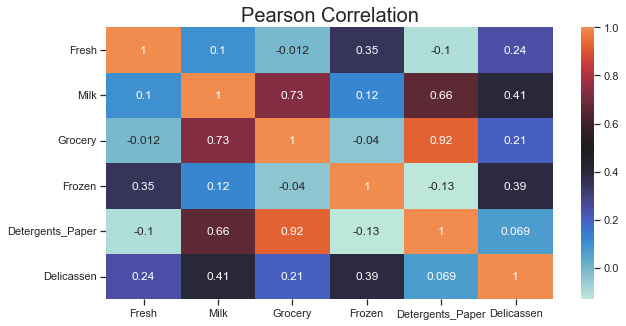

In [16]:
# Compute the correlation matrix
plt.figure(figsize=(10,5))
plt.title('Pearson Correlation',fontsize =20)
sns.heatmap(df.corr(), center=0.5,annot=True)

There is strong correlation (0.92) between the "detergents and paper products" and the "grocery products"



<a id="3"></a>
<font color="darkslateblue" size=+2.5><b>3. Deliverables:</b></font>

<a id="3.1"></a>
<font color="dimgrey" size=+2.0><b>3.1 Use methods of descriptive statistics to summarize data</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to Table of Content</a>

* **Measure of Central Tendency  :** Mean, Median, mode 
* **Measure of Dispersion  :** Range, IQR, Standard Deviation 


In [17]:
print('Descriptive Statastics:')
df.describe()

Descriptive Statastics:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [18]:
print('Descriptive Statastics Channel & Retail:')
df.describe(include='object')

Descriptive Statastics Channel & Retail:


,Channel,Region
count,440,440
unique,2,3
top,Hotel,Other
freq,298,316


In [19]:
#all varieties show similar behaviour across Region and Channel
df.groupby(['Channel','Region'])['Fresh', 'Milk', 'Grocery','Frozen','Detergents_Paper', 'Delicassen'].describe().T

Channel                        Hotel                               \
Region                        Lisbon        Oporto          Other   
Fresh            count     59.000000     28.000000     211.000000   
                 mean   12902.254237  11650.535714   13878.052133   
                 std    12342.008901   8969.362752   14746.572913   
                 min      514.000000      3.000000       3.000000   
                 25%     4437.500000   4938.250000    3702.500000   
                 50%     8656.000000   9787.000000    9612.000000   
                 75%    18135.000000  17031.500000   18821.000000   
                 max    56083.000000  32717.000000  112151.000000   
Milk             count     59.000000     28.000000     211.000000   
                 mean    3870.203390   2304.250000    3486.981043   
                 std     4298.321195   2968.628697    4508.505269   
                 min      258.000000    333.000000      55.000000   
                 25%     1071.000000   1146.000000    1188.500000   
                 50%     2280.000000   1560.500000    2247.000000   
                 75%     4995.500000   2344.750000    4205.000000   
                 max    23527.000000  16784.000000   43950.000000   
Grocery          count     59.000000     28.000000     211.000000   
                 mean    4026.135593   4395.500000    3886.734597   
                 std     3629.644143   3048.298815    3593.506056   
                 min      489.000000   1330.000000       3.000000   
                 25%     1620.000000   2373.750000    1666.000000   
                 50%     2576.000000   3352.000000    2642.000000   
                 75%     5172.500000   5527.500000    4927.500000   
                 max    16966.000000  13626.000000   21042.000000   
Frozen           count     59.000000     28.000000     211.000000   
                 mean    3127.322034   5745.035714    3656.900474   
                 std     3276.460124  11454.478518    4956.590848   
                 min       91.000000    264.000000      25.000000   
                 25%      966.000000    962.250000     779.000000   
                 50%     1859.000000   2696.500000    1960.000000   
                 75%     4479.000000   4617.000000    4542.500000   
                 max    18711.000000  60869.000000   36534.000000   
Detergents_Paper count     59.000000     28.000000     211.000000   
                 mean     950.525424    482.714286     786.682464   
                 std     1305.907616    425.310506    1099.970640   
                 min        5.000000     15.000000       3.000000   
                 25%      237.000000    182.750000     176.500000   
                 50%      412.000000    325.000000     375.000000   
                 75%      874.000000    707.000000     948.500000   
                 max     5828.000000   1679.000000    6907.000000   
Delicassen       count     59.000000     28.000000     211.000000   
                 mean    1197.152542   1105.892857    1518.284360   
                 std     1219.945304   1056.778800    3663.183304   
                 min        7.000000     51.000000       3.000000   
                 25%      374.000000    567.250000     378.500000   
                 50%      749.000000    883.000000     823.000000   
                 75%     1621.500000   1146.000000    1582.000000   
                 max     6854.000000   5609.000000   47943.000000   

Channel                       Retail                              
Region                        Lisbon        Oporto         Other  
Fresh            count     18.000000     19.000000    105.000000  
                 mean    5200.000000   7289.789474   9831.504762  
                 std     5415.521495   6867.934548   9635.394129  
                 min       18.000000    161.000000     23.000000  
                 25%     2378.250000   2368.000000   2343.000000  
                 50%     2926.000000   6468.000000   7362.000000  
             

In [20]:
for i in df.select_dtypes('int').columns:
    print(f'Standard Deviation of {i} is :',df[i].std())
    print('*****************************************************')

Standard Deviation of Fresh is : 12647.328865076892
*****************************************************
Standard Deviation of Milk is : 7380.377174570841
*****************************************************
Standard Deviation of Grocery is : 9503.162828994344
*****************************************************
Standard Deviation of Frozen is : 4854.673332592366
*****************************************************
Standard Deviation of Detergents_Paper is : 4767.854447904201
*****************************************************
Standard Deviation of Delicassen is : 2820.105937369397
*****************************************************


In [21]:
for i in df.select_dtypes('int').columns:
    print(f'IQR of {i} item : {st.iqr(df[i])}')
    print('*********************************')

IQR of Fresh item : 13806.0
*********************************
IQR of Milk item : 5657.25
*********************************
IQR of Grocery item : 8502.75
*********************************
IQR of Frozen item : 2812.0
*********************************
IQR of Detergents_Paper item : 3665.25
*********************************
IQR of Delicassen item : 1412.0
*********************************


# 

From the above two describe function, we can infer the following



* **Channel  :** It has two unique values and "Hotel" as most frequent with 298 out of 440 transactions.





* **Retail   :** It has three unique values, with "Other" as most frequent with 316 out of 440 transactions.



* **Fresh   :** It has a mean of 12000.3, standard deviation of 12647.3, with min value of 3 and max value of 112151 

        The other aspect is Q1(25%) is 3127.75, Q3(75%) is 16933.8, with Q2(50%) 8504, 
        range = max-min =112151-3=112,148 & IQR = Q3-Q1 = 16933.8-3127.75 = 13,806.05 (this helpful in calculating the outlier(1.5 IQR Lower/Upper limit))


* **Milk    :** It has a mean of 5796.27, standard deviation of 7380.38, with min value of 55 and max value of 73498.

            The other aspect is Q1(25%) is 1533, Q3(75%) is 7190.25, with Q2(50%) 3627
            range = max-min =73498-55=73443 & IQR = Q3-Q1 = 7190.25-1533 = 5657.25 (this helpful in calculating the outlier(1.5IQR Lower/Upper  limit))

* **Grocery    :** It has a mean of 7951.28, standard deviation of 9503.16, with min value of 3 and max value of 92780.

        The other aspect is Q1(25%) is 2153, Q3(75%) is 10655.8, with Q2(50%) 4755.5

        range = max-min =92780-3=92777 & IQR = Q3-Q1 = 10655.8-2153 = 8502.8 (this helpful in calculating the outlier(1.5 IQR Lower/Upper limit))


* **Frozen    :** It has a mean of 3071.93, standard deviation of 4854.67, with min value of 25 and max value of 60869.

                The other aspect is Q1(25%) is 742.25, Q3(75%) is 3554.25, with Q2(50%) 1526

                range = max-min =60869-25=60844 & IQR = Q3-Q1 = 3554.25-742.25 = 2812 (this helpful in calculating the outlier(1.5 IQR Lower/Upper limit))

* **Detergents_Paper    :** It has a mean of 2881.49, standard deviation of 4767.85, with min value of 3 and max value of 40827.

        The other aspect is Q1(25%) is 256.75, Q3(75%) is 3922, with Q2(50%) 816.5

        range = max-min =40827-3=40824 & IQR = Q3-Q1 = 3922-256.75 = 3665.25 (this helpful in calculating the outlier(1.5 IQR Lower/Upper limit))

* **Delicatessen    :** It has a mean of 1524.87, standard deviation of 2820.11, with min value of 3 and max value of 47943.

        The other aspect is Q1(25%) is 408.25, Q3(75%) is 1820.25, with Q2(50%) 965.5

        range = max-min =47943-3=47940 & IQR = Q3-Q1 = 1820.25-408.25 = 1412 (this helpful in calculating the outlier(1.5 IQR Lower/Upper limit))

# 

<a id="3.1.1"></a>
<font color="dimgrey" size=+2.0><b>3.1.1 Which Region and which Channel seems to spend more?</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to Table of Content</a>

In [22]:
#creating sum of all the products into a new column - Total_spend
df['Total_spend'] = df['Fresh'] + df['Milk'] + df['Grocery'] + df['Frozen'] + df['Detergents_Paper'] + df['Delicassen']

In [23]:
total_spend_by_region = df.groupby('Region')['Total_spend'].sum()
total_spend_by_region

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Total_spend, dtype: int64

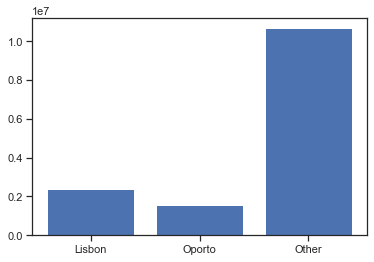

In [24]:
plt.bar(total_spend_by_region.keys(),total_spend_by_region);

# From the above graph More spend in the Region is from Others 

# 

In [25]:
total_spend_by_channel = df.groupby('Channel')['Total_spend'].sum()
total_spend_by_channel

Channel
Hotel     7999569
Retail    6619931
Name: Total_spend, dtype: int64

<BarContainer object of 2 artists>

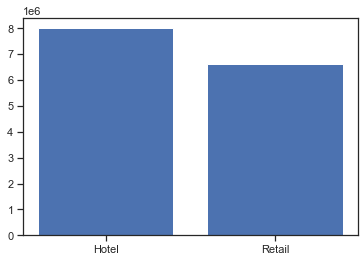

In [26]:
plt.bar(total_spend_by_channel.keys(),total_spend_by_channel)

# From the above graph More spend in the Channel is from Hotel 

# 

<a id="3.1.2"></a>
<font color="dimgrey" size=+2.0><b>3.1.2 Which Region and which Channel seems to spend less?</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to Table of Content</a>

In [27]:
region_total_spend = df.groupby(['Region'])['Total_spend'].sum()
region_total_spend

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Total_spend, dtype: int64

array([<AxesSubplot:ylabel='Total_spend'>], dtype=object)

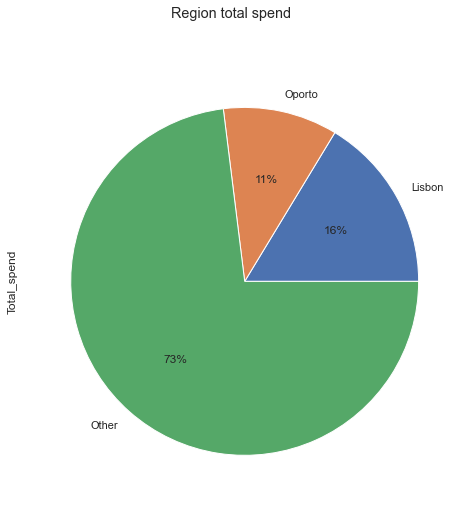

In [28]:
region_total_spend.plot.pie(subplots=True,autopct='%.0f%%',figsize=(15,8),title='Region total spend')

# From the above Chart Less spend in the Region is from Oporto

# 

In [29]:
channel_total_spend = df.groupby(['Channel'])['Total_spend'].sum()
channel_total_spend

Channel
Hotel     7999569
Retail    6619931
Name: Total_spend, dtype: int64

array([<AxesSubplot:ylabel='Total_spend'>], dtype=object)

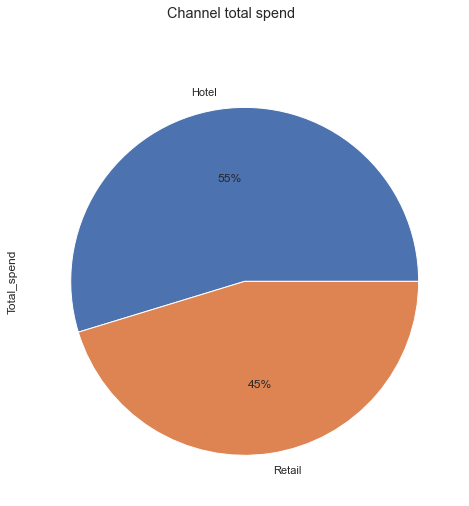

In [30]:
channel_total_spend.plot.pie(subplots=True,autopct='%.0f%%',figsize=(15,8),title='Channel total spend')

# From the above graph Less spend in the Channel is from Retail

# 

<a id="3.2"></a>
<font color="dimgrey" size=+2.0><b>3.2 Do all varieties show similar behaviour across Region and Channel?</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to Table of Content</a>

* **There are 6 different varieties of items are considered**


Behaviour of Fresh across with Region and Channel


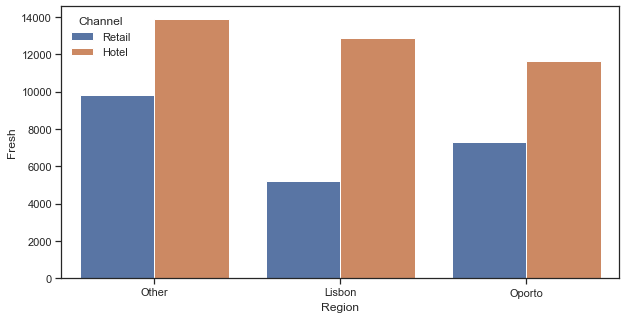

In [31]:
print('Behaviour of Fresh across with Region and Channel')
plt.figure(figsize=(10,5))
sns.barplot(x="Region", y="Fresh", hue ="Channel",data=df,ci=False);

Behaviour of Milk across with Region and Channel


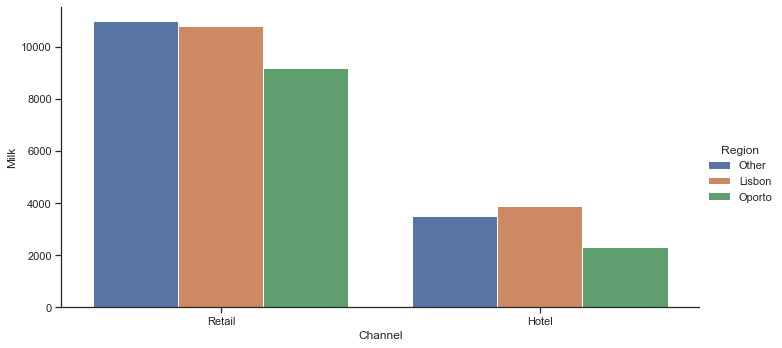

In [32]:
print('Behaviour of Milk across with Region and Channel')
sns.catplot(x="Channel", y="Milk", hue ="Region",kind='bar',data=df,ci=False,aspect=2);

Behaviour of Grocery across with Region and Channel


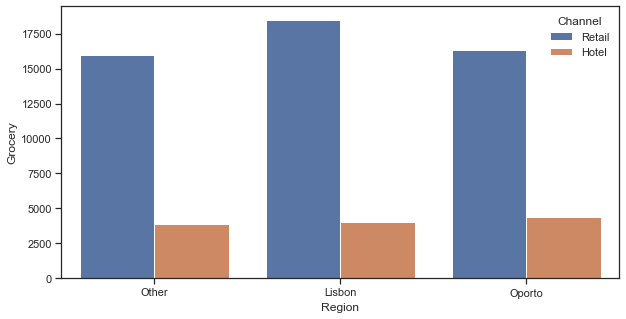

In [34]:
print('Behaviour of Grocery across with Region and Channel')
plt.figure(figsize=(10,5))
sns.barplot(x="Region", y="Grocery", hue ="Channel",data=df,ci=False);

Behaviour of Frozen with Region and Channel


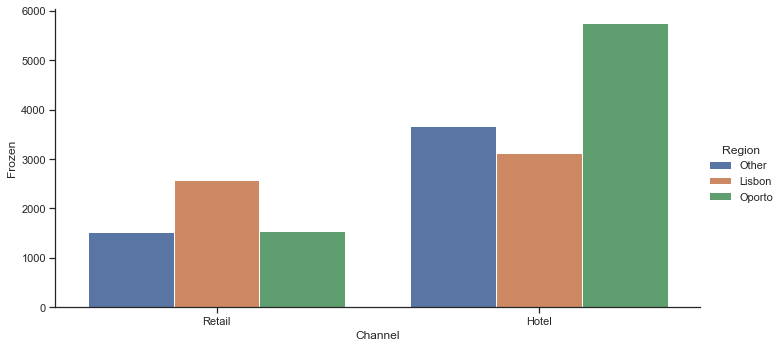

In [35]:
print('Behaviour of Frozen with Region and Channel')
sns.catplot(x="Channel", y="Frozen", hue ="Region",kind='bar',data=df,ci=False,aspect=2);

Behaviour of Detergents Paper across with Region and Channel


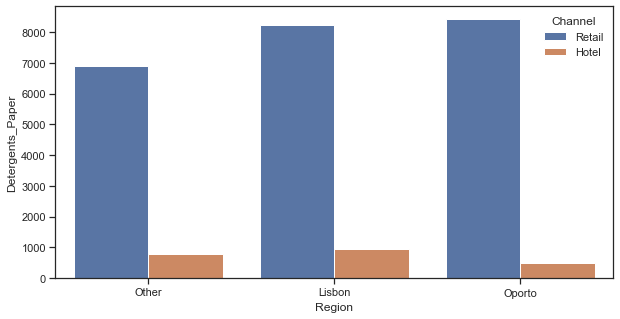

In [36]:
print('Behaviour of Detergents Paper across with Region and Channel')
plt.figure(figsize=(10,5))
sns.barplot(x="Region", y="Detergents_Paper", hue ="Channel",data=df,ci=False);

Behaviour of Delicassen with Region and Channel


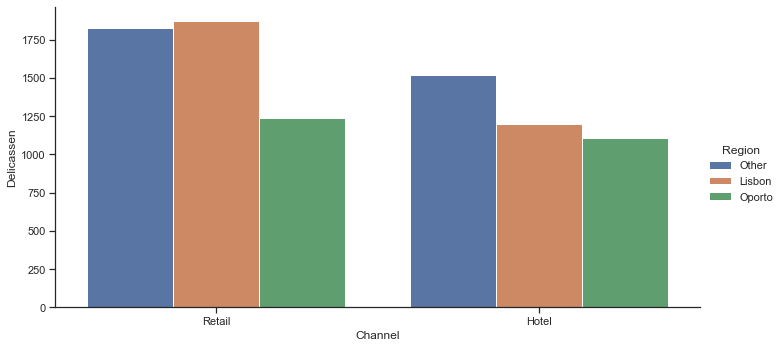

In [37]:
print('Behaviour of Delicassen with Region and Channel')
sns.catplot(x="Channel", y="Delicassen", hue ="Region",kind='bar',data=df,ci=False,aspect=2);

# 

<a id="3.3"></a>
<font color="dimgrey" size=+2.0><b>3.3.1 Which item shows the most inconsistent behaviour?</b></font>                        


<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to Table of Content</a>

<a id="3.3"></a>
<font color="dimgrey" size=+2.0><b>3.3.2 Which item shows the Least inconsistent behaviour?</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to Table of Content</a>


* **On the basis of the descriptive measure of variability**


In [38]:
# variance = standard deviation / mean
l1,l2= [],[]
for i in df.select_dtypes('int').columns:
    if i == "Total_spend":
        pass
    else:
        print(f'The coefficient of variation for {i} is : {round(st.variation(df[i]),2)}')
        l1.append(i)
        l2.append(round(st.variation(df[i]),2))
        

The coefficient of variation for Fresh is : 1.05
The coefficient of variation for Milk is : 1.27
The coefficient of variation for Grocery is : 1.19
The coefficient of variation for Frozen is : 1.58
The coefficient of variation for Detergents_Paper is : 1.65
The coefficient of variation for Delicassen is : 1.85


In [39]:
var_df = pd.DataFrame({'items':l1,'variation':l2})

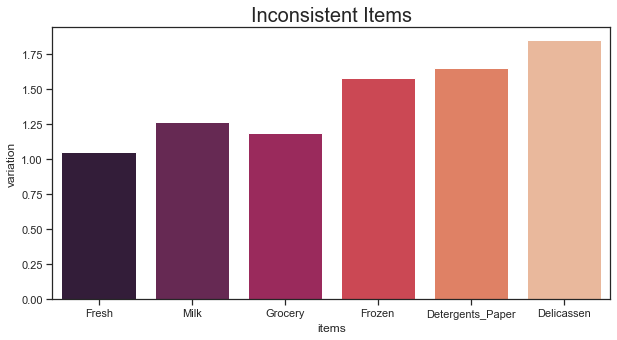

In [40]:
plt.figure(figsize=(10,5))
plt.title('Inconsistent Items',fontsize=20)
sns.barplot(x='items',y='variation',data=var_df,palette='rocket');


* ** Delicassen shows the most inconsistant **
* ** Fresh shows the least inconsistant **


# 

<a id="3.4"></a>
<font color="dimgrey" size=+2.0><b>3.4 Which columns in the dataset are of type Categorical and which are of type Numerical?</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to Table of Content</a>

In [41]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(f'{i} column of categorical Data Type')
    else:        
        print(f'{i} column of Numerical Data Type')

Channel column of categorical Data Type
Region column of categorical Data Type
Fresh column of Numerical Data Type
Milk column of Numerical Data Type
Grocery column of Numerical Data Type
Frozen column of Numerical Data Type
Detergents_Paper column of Numerical Data Type
Delicassen column of Numerical Data Type
Total_spend column of Numerical Data Type


# 

<a id="4"></a>
<font color="dimgrey" size=+2.0><b>4 Conclusion of the EDA </b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to Table of Content</a>

To conclude if a new online shopping app is planning to launch a product for selling wholesale products to small businesses.I will suggest you should target to do Detergents_paper and Grocery products because consumers would often spend money on these two types of product.Once App has launched products for selling wholesale products so i will suggest you should target at Other Region and Hotel Channel because consumers would often spend money on these Other Region and Hotel Channel.but, if i talk about only Detergents_paper products and Grocery products so you should target at Retail Channel and All Region because grocery products is must for all customers.and try to much target at Lisbon Region.

* **Thank you for reading this data annalysis with me until the end**


